### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

We will use one the datasets which is kept on the Seaborn library.

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


we will use 'car_crashed' dataset for our future work.
so, let's load that first.

In [4]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


Let's do the work through ploting different senaio.

### Distribution plot

Distribution plot is used for plotting Univariet Distribution

/home/nux/Desktop/Hands-on-Machine-Learning/venv/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='not_distracted', ylabel='Density'>

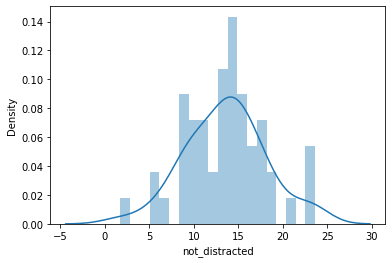

In [15]:
sns.distplot(crash_df['not_distracted'], kde=True, bins=20)

### Joint Plot

Joint plot is used to compare between two distribution

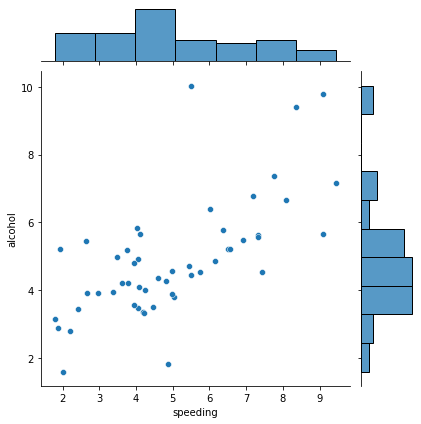

In [22]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df,  kind='scatter')

## KDE plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

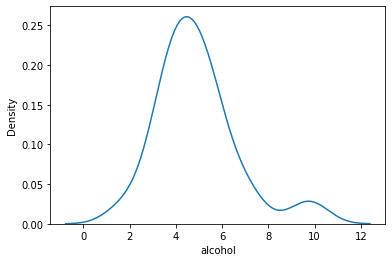

In [25]:
sns.kdeplot(crash_df['alcohol'])

### Pair plot

A pairs plot is a matrix of scatterplots that lets you understand the pairwise relationship between different variables in a dataset.

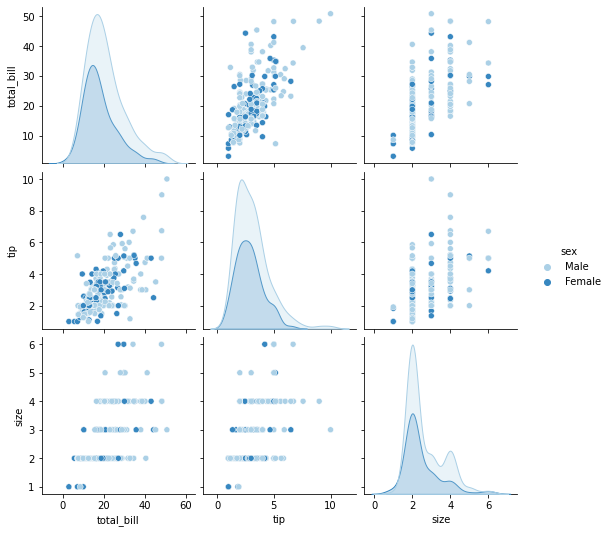

In [27]:
tips_df = sns.load_dataset('tips')
sns.pairplot(tips_df, hue='sex', palette='Blues')

### Rug plot

<AxesSubplot:xlabel='tip'>

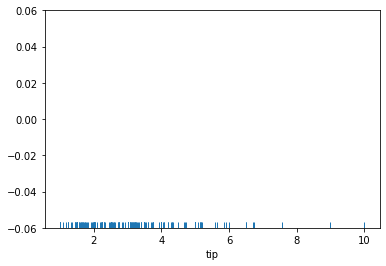

In [28]:
sns.rugplot(tips_df['tip'])

### Styling

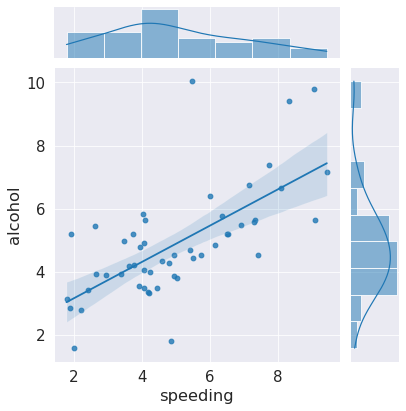

In [35]:
sns.set_style('darkgrid')

sns.set_context('paper', font_scale=1.7)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

## Categorical plots

### Bar plot

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

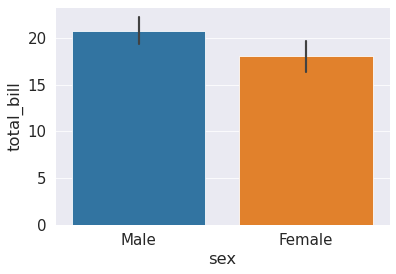

In [36]:
sns.barplot(x='sex', y='total_bill', data=tips_df)

### Count plot

<AxesSubplot:xlabel='sex', ylabel='count'>

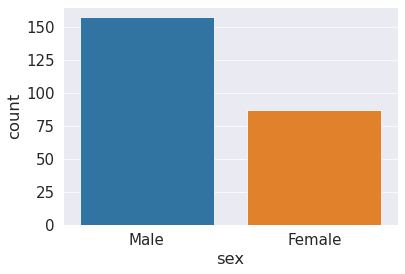

In [37]:
sns.countplot(x='sex', data=tips_df)

### Box plot

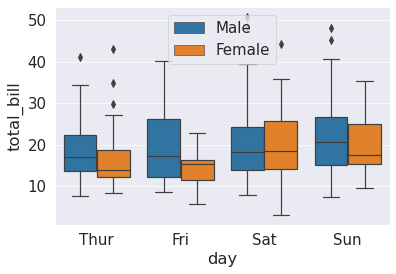

In [41]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')
plt.legend(loc=0)

### Violin plot

violin plot = Boxplot + kde plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

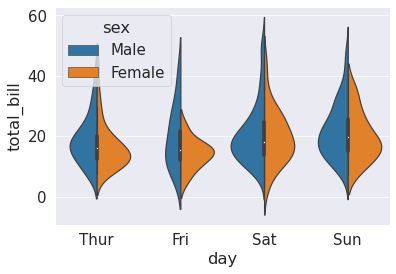

In [44]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

### Strip plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

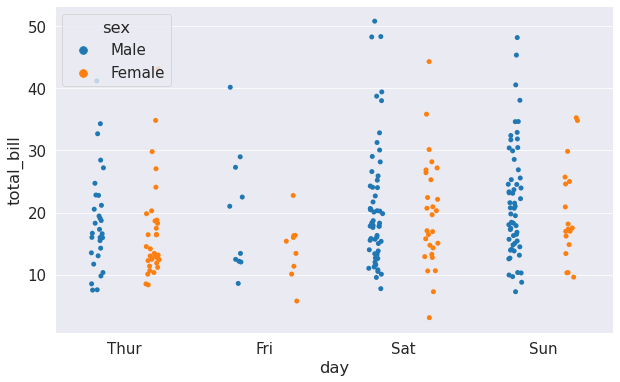

In [49]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)

### Swarm plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

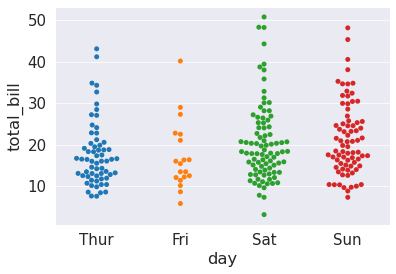

In [50]:
sns.swarmplot(x='day', y='total_bill', data=tips_df)

### Palette

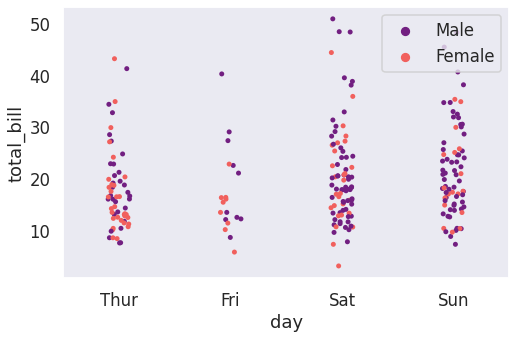

In [55]:
plt.figure(figsize=(8, 5))
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='magma')
plt.legend(loc=1)


## Matrix plots

### Heatmaps

<AxesSubplot:>

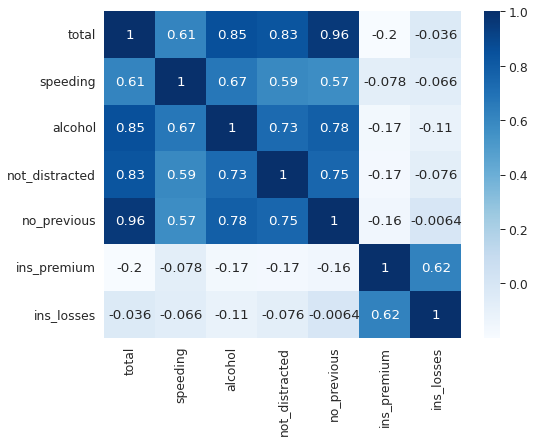

In [56]:
plt.figure(figsize=(8, 6))
sns.set_context('paper', font_scale=1.4)

crash_mx = crash_df.corr()
sns.heatmap(crash_mx, annot=True, cmap='Blues')

<AxesSubplot:xlabel='year', ylabel='month'>

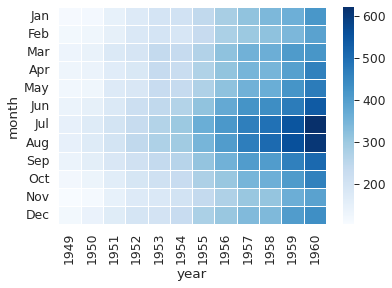

In [60]:
flights = sns.load_dataset('flights')
flights = flights.pivot_table(index='month', columns='year', values='passengers')
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidths=1)

### Pair grid

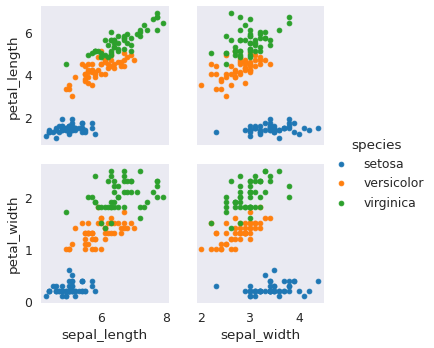

In [67]:
iris = sns.load_dataset('iris')

iris_g = sns.PairGrid(iris, hue='species',x_vars = ['sepal_length', 'sepal_width'],
y_vars = ['petal_length', 'petal_width'])
iris_g.map(plt.scatter)
iris_g.add_legend()



## Facet Grid

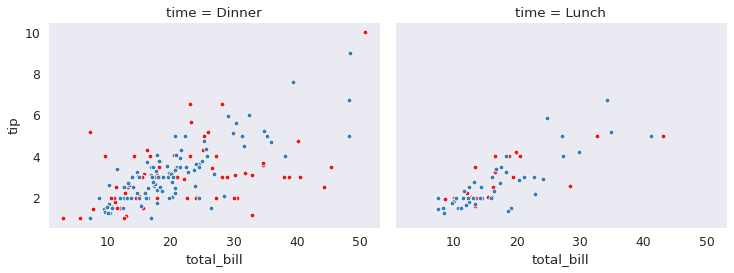

In [75]:
tips_fg = sns.FacetGrid(tips_df, col='time',hue='smoker', height=4, aspect=1.3, col_order=['Dinner', 'Lunch'], palette='Set1')
tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='white')

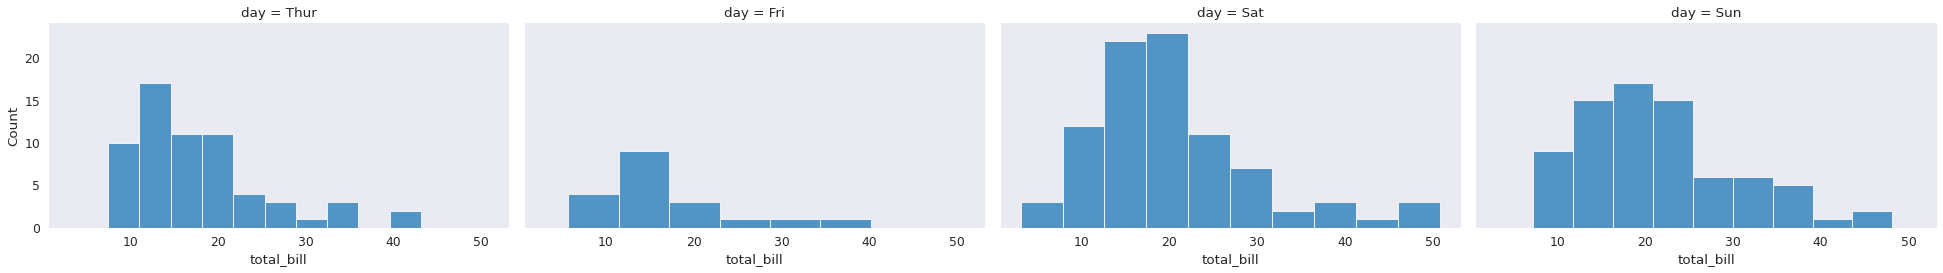

In [81]:
# another example 

ex = sns.FacetGrid(tips_df, col='day', height=4, aspect=1.7)
ex.map(sns.histplot, 'total_bill')